In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

pp = PdfPages('multipage.pdf')

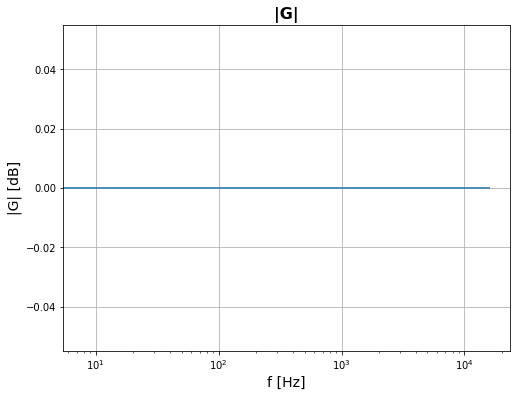

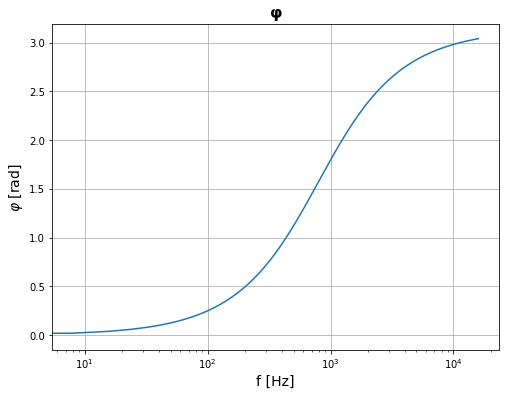

In [2]:
plt.rcParams['figure.figsize'] = (8,6)
R = 20e3
C = 10e-9
G = lambda w: (1 + 1j*w*R*C)/(1 - 1j*w*R*C)
w = np.linspace(0,1e5,2000)

G_ = [int(round(x)) for x in np.abs(G(w))]
G_db = 20*np.log10(G_)

plt.plot(w/(2*np.pi), G_db)
plt.xscale('log')
plt.xlabel('f [Hz]', fontsize=14)
plt.ylabel('|G| [dB]', fontsize=14)
plt.title('|G|', fontsize=16, weight='bold')
plt.grid()
pp.savefig()
plt.show()

plt.xlabel('f [Hz]', fontsize=14)
plt.xscale('log')
plt.ylabel('$\\varphi$ [rad]', fontsize=14)
plt.title('$\\mathbf{\\varphi}$', fontsize=16, weight='bold')
plt.plot(w/(2*np.pi), np.angle(G(w)))
# plt.plot(w/(2*np.pi), 2*np.arctan(w*R*C))
plt.grid()
pp.savefig()
plt.show()

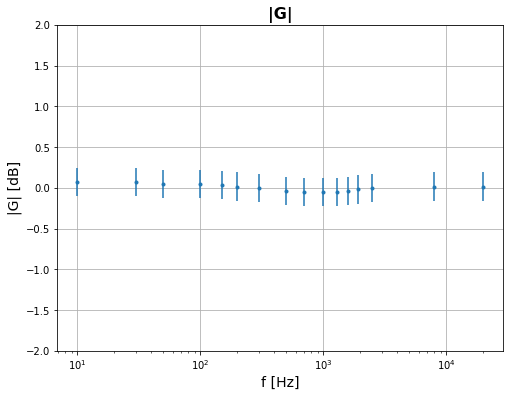

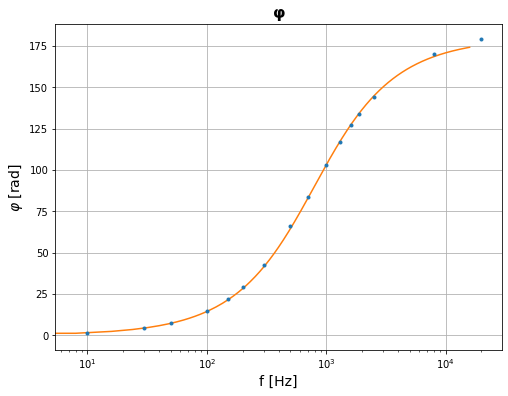

In [3]:
plt.rcParams['figure.figsize'] = (8,6)
R = 20e3
C = 10e-9

df = pd.read_csv('data/bode.csv')
df['G'] = 20*np.log10(df.V / 5)
df['dG'] = 20/np.log(10)/df.V * 0.1
df['dphi'] = [0.5 for i in df.G]

plt.errorbar(df.f, df.G, fmt='.', yerr=df.dG)
plt.xscale('log')
plt.xlabel('f [Hz]', fontsize=14)
plt.ylabel('|G| [dB]', fontsize=14)
plt.title('|G|', fontsize=16, weight='bold')
plt.ylim(-2,2)
plt.grid()
pp.savefig()
plt.show()

plt.xlabel('f [Hz]', fontsize=14)
plt.xscale('log')
plt.ylabel('$\\varphi$ [rad]', fontsize=14)
plt.title('$\\mathbf{\\varphi}$', fontsize=16, weight='bold')
plt.errorbar(df.f, -df.phi, fmt='.', yerr=df.dphi)
plt.plot(w/(2*np.pi), np.angle(G(w))/np.pi*180)
plt.grid()
pp.savefig()
plt.show()

In [4]:
pp.close()